# Chargement des données

In [1]:
import pandas as pd

avis_restaurants = pd.read_csv('D:/M2 SISE/Text Mining ou NLP/Projet/nlp_text_mining/Data/avis_restaurants_cleaned.csv') 

In [2]:
avis_restaurants

,user,user_profile,date_review,title,rating,type_visit,num_contributions,review,restaurant,review_cleaned,year,month
0,Fred S,fredsX5996LQ,2024-12-15,Très belle expérience,5.0,family,8,"Ambiance soignée, patrons amicaux et donnant t...",Frazarin Bistrot Franco Italien,ambiance soignée patron amicaux donnant toutes...,2024,12
1,Guide38409630404,Guide38409630404,2024-11-27,"Déjeuner au Frazarin, que du bonheur",5.0,friends,1,"Vous voulez bien manger, alors allez dans ce r...",Frazarin Bistrot Franco Italien,voulez bien manger alors allez restaurant tout...,2024,11
2,Chartin M,chartinm,2024-11-20,La perfection tout simplement,5.0,couples,4,Tout simplement parfait de l’entrée au dessert...,Frazarin Bistrot Franco Italien,tout simplement parfait lentrée dessert passan...,2024,11
3,Axelfoley009,Axelfoley009,2024-11-18,Plat frais et de qualité,5.0,couples,38,Belle soirée passée au Frazarin. Certainement ...,Frazarin Bistrot Franco Italien,belle soirée passée frazarin certainement enco...,2024,11
4,Karine P,karinepU103AS,2024-11-13,très bien,5.0,business,1,Très bon restaurant ! j'ai adoré le service et...,Frazarin Bistrot Franco Italien,très bon restaurant jai adoré service loffre r...,2024,11
...,...,...,...,...,...,...,...,...,...,...,...,...
4120,Muriel P,752murielp,2016-11-04,Des troyens visitent Lyon,4.0,family,6,Bon petit resto. Service efficace et agréable....,Le Vieux Lyon,bon petit resto service efficace agréable cuis...,2016,11
4121,Natacha B,natachab927,2016-10-25,Génial!,5.0,family,3,Un super service! Avec de très bons plats😊 rec...,Le Vieux Lyon,super service très bons plat recommandé sans h...,2016,10
4122,Loïc D,lo_cd778,2016-10-16,tres bien,4.0,couples,35,"Acceuil sympa , notre serveur dans le jus mais...",Le Vieux Lyon,acceuil sympa serveur jus très efficace cétait...,2016,10
4123,357518,357518,2016-10-13,"Touristes, mais aussi habitués !",4.0,none,30,"De loin, le meilleur petit restau de la rue......",Le Vieux Lyon,loin meilleur petit restau rue cuisine familia...,2016,10


# Analyse de Sentiment

In [3]:
avis_restaurants['sentiment_rating'] = avis_restaurants['rating'].apply(
    lambda x: 'Positif' if x > 3 else ('Négatif' if x < 3 else 'Neutre')
)

In [4]:
import pandas as pd
import numpy as np
import re
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Convertir les ratings en 3 classes : Négatif (0), Positif (1), Neutre (2)
def sentiment_class(rating):
    if rating == 3:
        return 2  # Neutre
    elif rating >= 4:
        return 1  # Positif
    else:
        return 0  # Négatif

# Appliquer la fonction de conversion
avis_restaurants['sentiment'] = avis_restaurants['rating'].apply(sentiment_class)

# Tokenisation des avis
tokenizer = Tokenizer(num_words=10000)  # Limite de vocabulaire à 10,000 mots
tokenizer.fit_on_texts(avis_restaurants['review_cleaned'])
X = tokenizer.texts_to_sequences(avis_restaurants['review_cleaned'])

# Padding des séquences pour avoir des longueurs égales
X_pad = pad_sequences(X, padding='post', maxlen=200)  # Limite de 200 mots par avis

# Cibles (sentiment)
y = avis_restaurants['sentiment']

In [5]:
# Séparation en jeu d'entraînement et test
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)

# Création du modèle LSTM pour 3 classes
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=200))  # Couche d'embedding
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))  # Couche LSTM
model.add(Dense(3, activation='softmax'))  # 3 classes, activation softmax pour la classification multi-classes

# Compilation du modèle
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entraînement du modèle
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), verbose=1)

# Évaluation du modèle
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)  # La classe avec la probabilité la plus élevée

# Calcul de la précision
accuracy = accuracy_score(y_test, y_pred)  
print(f"Précision du modèle LSTM : {accuracy * 100:.2f}%")

e:\Application\Anaconda\envs\Nlp_projet\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 31s 505ms/step - accuracy: 0.8438 - loss: 0.6457 - val_accuracy: 0.8461 - val_loss: 0.5285
Epoch 2/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 30s 581ms/step - accuracy: 0.8332 - loss: 0.5668 - val_accuracy: 0.8461 - val_loss: 0.5289
Epoch 3/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 28s 546ms/step - accuracy: 0.8439 - loss: 0.5380 - val_accuracy: 0.8461 - val_loss: 0.5281
Epoch 4/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 36s 707ms/step - accuracy: 0.8464 - loss: 0.5334 - val_accuracy: 0.8473 - val_loss: 0.5333
Epoch 5/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 33s 637ms/step - accuracy: 0.8366 - loss: 0.5484 - val_accuracy: 0.8485 - val_loss: 0.5307
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step
Précision du modèle LSTM : 84.85%


In [6]:
# mettre avis_restaurants[['rating', 'review_cleaned' ,'sentiment', 'sentiment_rating']].tail(40) dans un dataframe

# Sélectionner les 40 dernières lignes des colonnes spécifiées
df_tail = avis_restaurants[['rating', 'review_cleaned', 'sentiment', 'sentiment_rating']].tail(40)

# Afficher le dataframe résultant
df_tail


,rating,review_cleaned,sentiment,sentiment_rating
4085,3.0,service très bien contre culinairement tout sa...,2,Neutre
4086,2.0,serveur très accueillant cela jeté atmosphère ...,0,Négatif
4087,5.0,passé très bon moment serveur très sympathique...,1,Positif
4088,5.0,bon bouchon historique histoire plat bons tout...,1,Positif
4089,4.0,excellent bouchon proposent plat traditionnels...,1,Positif
4090,4.0,grand merci serveur gigi bonne humeur très com...,1,Positif
4091,4.0,menu entréeplatdésert rapportqualité prix très...,1,Positif
4092,3.0,bouchon lyonnais moyen service sympa repas nes...,2,Neutre
4093,4.0,service très sympathique drôle bons plat prix ...,1,Positif
4094,4.0,repas correct serveur très sympathique très be...,1,Positif


# Identification des thèmes avec Word Embeddings

Utiliser un modèle pré-entraîné

In [7]:
from gensim.models import Word2Vec

# Tokenisation des avis
tokens = [avis.split() for avis in avis_restaurants['review_cleaned']]

# Entraîner un modèle Word2Vec
model = Word2Vec(sentences=tokens, vector_size=100, window=5, min_count=2, workers=4)

# Exemple : mots similaires à "service"
print(model.wv.most_similar('service'))


[('rapide', 0.9968728423118591), ('efficace', 0.9961428642272949), ('personnel', 0.9956075549125671), ('top', 0.9955253601074219), ('impeccable', 0.9944115877151489), ('sympa', 0.9943687319755554), ('bonne', 0.9932730793952942), ('professionnel', 0.9917820692062378), ('raffinée', 0.9913903474807739), ('ambiance', 0.9910362362861633)]


Clusterisation pour regrouper les thèmes

In [8]:
from sklearn.cluster import KMeans
import numpy as np

# Extraire les vecteurs de mots
word_vectors = np.array([model.wv[word] for word in model.wv.index_to_key])

# Clusterisation en 5 thèmes
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(word_vectors)

# Associer chaque mot à un cluster
word_clusters = {word: kmeans.labels_[i] for i, word in enumerate(model.wv.index_to_key)}

# Afficher les mots par cluster
for cluster in range(5):
    print(f"Thème {cluster + 1}:")
    print([word for word, label in word_clusters.items() if label == cluster])
    print("\n")


Thème 1:
['travaillés', 'accueillis', 'bientôt', 'abordable', 'pleine', 'hésitation', 'testé', 'appréciable', 'imprenable', 'correcte', 'soigné', 'bruyant', 'courte', 'élevé', 'final', 'aime', 'cosy', 'qualités', 'dynamique', 'ème', 'toits', 'atypique', 'rare', 'inoubliable', 'change', 'grandes', 'peux', 'passion', 'déjeuné', 'coeur', 'complet', 'heure', 'bruyante', 'voulez', 'humeur', 'typiquement', 'mange', 'conseillé', 'sympas', 'locale', 'découvertes', 'nouvelle', 'recherchés', 'meilleure', 'disponible', 'particulière', 'arrivé', 'présenté', 'enfant', 'fêter', 'lent', 'laise', 'commentaires', 'réputation', 'prend', 'mariage', 'fête', 'présent', 'attendre', 'tard', 'nombre', 'certain', 'explication', 'lexpérience', 'laissé', 'ami', 'hier', 'dexception', 'compétent', 'passant', 'fausse', 'donné', 'moderne', 'certainement', 'particulier', 'allé', 'ravis', 'cuisinier', 'voilà', 'restauration', 'veut', 'région', 'pourrait', 'accueillante', 'typiques', 'moyenne', 'attend', 'occasion', 'a

# Recommandations

Identifie les points positifs et négatifs des avis pour générer des recommandations :

Regroupe les mots les plus fréquents dans les avis positifs/négatifs.

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords


# Charger les mots d'arrêt en français
french_stopwords = stopwords.words('french')

# Vectorisation des avis en excluant les mots d'arrêt en français
vectorizer = CountVectorizer(stop_words=french_stopwords)
X = vectorizer.fit_transform(avis_restaurants['review_cleaned'])


# Extraire les mots les plus fréquents dans les avis positifs et négatifs
positive_reviews = avis_restaurants[avis_restaurants['sentiment'] == 1]['review_cleaned']
negative_reviews = avis_restaurants[avis_restaurants['sentiment'] == 0]['review_cleaned']
neutre_reviews = avis_restaurants[avis_restaurants['sentiment'] == 2]['review_cleaned']

positive_matrix = vectorizer.transform(positive_reviews)
negative_matrix = vectorizer.transform(negative_reviews)
neutre_matrix = vectorizer.transform(neutre_reviews)

positive_freq = np.asarray(positive_matrix.sum(axis=0)).flatten()
negative_freq = np.asarray(negative_matrix.sum(axis=0)).flatten()
neutre_freq = np.asarray(neutre_matrix.sum(axis=0)).flatten()


# Mots fréquents dans les avis positifs
positive_words = [word for word, freq in zip(vectorizer.get_feature_names_out(), positive_freq) if freq > 10]
# Mots fréquents dans les avis négatifs
negative_words = [word for word, freq in zip(vectorizer.get_feature_names_out(), negative_freq) if freq > 10]
# Mots fréquents dans les avis neutre
neutre_words = [word for word, freq in zip(vectorizer.get_feature_names_out(), neutre_freq) if freq > 10]

print("Points Positifs :", positive_words)
print("Points Négatifs :", negative_words)
print("Points neutre :", neutre_words)


Points Positifs : ['abordable', 'abordables', 'absolument', 'accessible', 'acceuil', 'accompagnement', 'accompagnements', 'accompagner', 'accompagné', 'accompagnés', 'accord', 'accueil', 'accueillant', 'accueillante', 'accueilli', 'accueillis', 'adapté', 'addition', 'adorable', 'adore', 'adoré', 'adresse', 'afin', 'agastache', 'agréable', 'agréablement', 'agréables', 'ailleurs', 'aimable', 'aimables', 'aime', 'aimé', 'ainsi', 'aller', 'allez', 'allezy', 'allé', 'allés', 'alors', 'amateur', 'ambiance', 'ami', 'amie', 'amis', 'amoureux', 'ancien', 'andouillette', 'anniversaire', 'années', 'appréciable', 'apprécier', 'apprécié', 'appétit', 'après', 'apéritif', 'apéro', 'arrivent', 'arrivée', 'arrivés', 'assez', 'assiette', 'assiettes', 'association', 'associés', 'attend', 'attendre', 'attente', 'attentes', 'attentif', 'attention', 'attentionné', 'attentionnés', 'atypique', 'aucun', 'aucune', 'aussi', 'autant', 'authentique', 'autour', 'autre', 'autres', 'avant', 'avis', 'avoir', 'avon', '

# Évolution du Sentiment dans le Temps

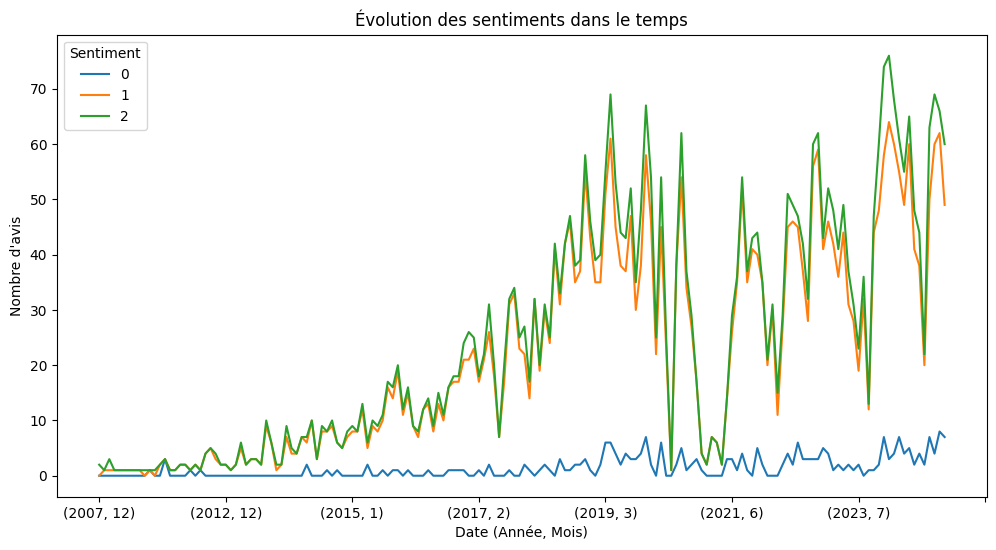

In [10]:
import matplotlib.pyplot as plt

# Calculer la répartition des sentiments par mois
sentiments_par_mois = avis_restaurants.groupby(['year', 'month', 'sentiment']).size().unstack().fillna(0)

# Visualiser l'évolution
sentiments_par_mois.plot(kind='line', stacked=True, figsize=(12, 6))
plt.title("Évolution des sentiments dans le temps")
plt.xlabel("Date (Année, Mois)")
plt.ylabel("Nombre d'avis")
plt.legend(title="Sentiment")
plt.show()

# Résumé Automatique des Avis

In [11]:
from transformers import pipeline

# Pipeline pour le résumé
summarizer = pipeline("summarization")

# Résumer un avis
avis_exemple = avis_restaurants['review_cleaned'].iloc[0]
resume = summarizer(avis_exemple, max_length=50, min_length=10, do_sample=False)
print("Résumé :", resume[0]['summary_text'])

e:\Application\Anaconda\envs\Nlp_projet\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No model was supplied, defaulted to google-t5/t5-small and revision df1b051 (https://huggingface.co/google-t5/t5-small).
Using a pipeline without specifying a model name and revision in production is not recommended.


All PyTorch model weights were used when initializing TFT5ForConditionalGeneration.

All the weights of TFT5ForConditionalGeneration were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.
Device set to use 0


Résumé : plat beau plat choix type très bien cuisiné assaisonné portion équilibrées belle carte vins très fournies bravo reviendrons .


# Comparer les sentiments ou thèmes avec les notes attribuées

Ajouter une analyse descriptive des notes par sentiment

sentiment_rating
Neutre     3.000000
Négatif    1.690377
Positif    4.757828
Name: rating, dtype: float64


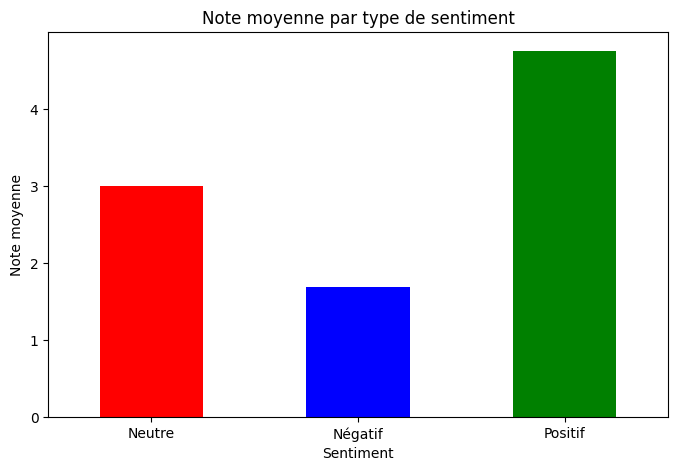

In [12]:
# Calculer la note moyenne par sentiment
sentiment_note_moyenne = avis_restaurants.groupby('sentiment_rating')['rating'].mean()
print(sentiment_note_moyenne)

# Visualiser avec un graphique
import matplotlib.pyplot as plt

sentiment_note_moyenne.plot(kind='bar', color=['red', 'blue', 'green'], figsize=(8, 5))
plt.title("Note moyenne par type de sentiment")
plt.ylabel("Note moyenne")
plt.xlabel("Sentiment")
plt.xticks(rotation=0)
plt.show()


Analyse des thèmes les plus fréquents par note

In [13]:
# Fonction pour obtenir les mots fréquents selon la note
def mots_frequents_par_note(data, note_min, note_max):
    avis = data[(data['rating'] >= note_min) & (data['rating'] <= note_max)]['review_cleaned']
    tous_mots = ' '.join(avis).split()
    return Counter(tous_mots).most_common(10)

# Exemples pour différentes plages de notes
mots_notes_basses = mots_frequents_par_note(avis_restaurants, 1, 2)
mots_notes_moyennes = mots_frequents_par_note(avis_restaurants, 3, 3)
mots_notes_hautes = mots_frequents_par_note(avis_restaurants, 4, 5)

print("Mots fréquents (notes basses) :", mots_notes_basses)
print("Mots fréquents (notes moyennes) :", mots_notes_moyennes)
print("Mots fréquents (notes hautes) :", mots_notes_hautes)

NameError: name 'Counter' is not defined

# Analyse intra-restaurant : Comparaison avant/après une date

Diviser les données en deux périodes

In [ ]:
# Assurez-vous que la colonne 'date_review' est bien de type datetime
avis_restaurants['date_review'] = pd.to_datetime(avis_restaurants['date_review'], errors='coerce')


In [ ]:
# Définir une date de seuil
date_seuil = '2024-01-01'

# Créer une colonne pour indiquer si l'avis est avant ou après la date
avis_restaurants['periode'] = avis_restaurants['date_review'].apply(
    lambda x: 'Avant' if x < pd.to_datetime(date_seuil) else 'Après'
)

# Vérifier la distribution des avis par période
print(avis_restaurants['periode'].value_counts())


periode
Avant    3428
Après     697
Name: count, dtype: int64


Analyser les sentiments par période

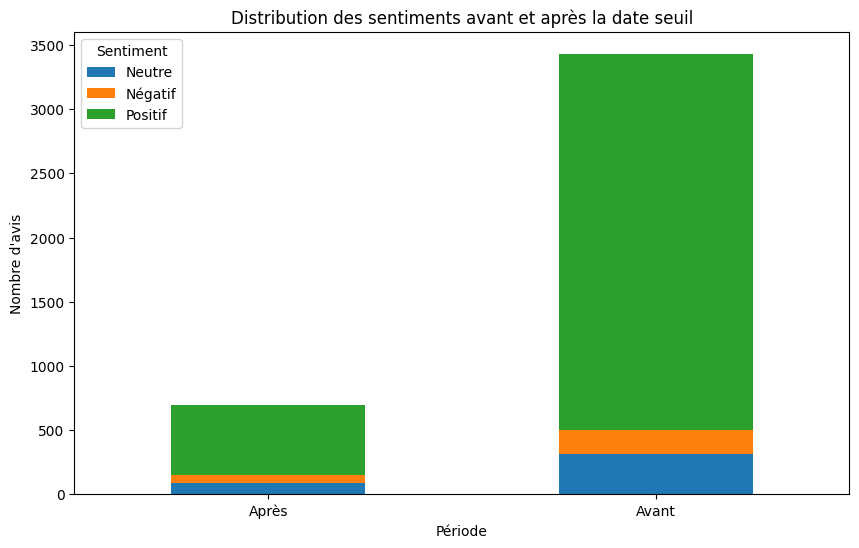

In [101]:
# Distribution des sentiments par période
sentiments_par_periode = avis_restaurants.groupby(['periode', 'sentiment_rating']).size().unstack().fillna(0)

# Visualiser avec un graphique
sentiments_par_periode.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Distribution des sentiments avant et après la date seuil")
plt.xlabel("Période")
plt.ylabel("Nombre d'avis")
plt.xticks(rotation=0)
plt.legend(title="Sentiment")
plt.show()


Comparer les notes avant et après la date

periode
Après    4.274032
Avant    4.434656
Name: rating, dtype: float64


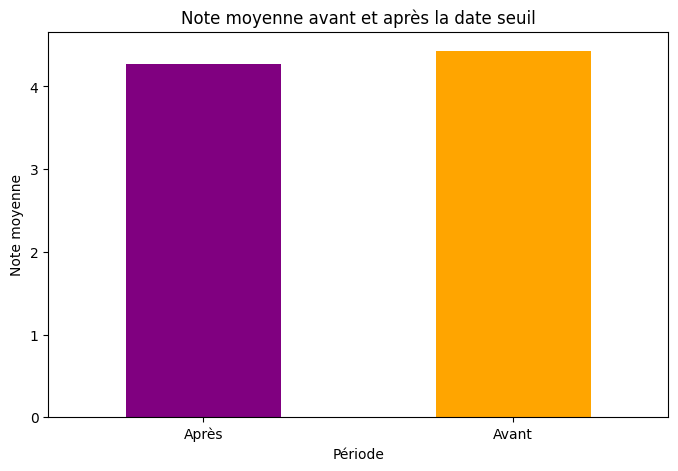

In [102]:
# Note moyenne par période
note_moyenne_par_periode = avis_restaurants.groupby('periode')['rating'].mean()
print(note_moyenne_par_periode)

# Visualiser
note_moyenne_par_periode.plot(kind='bar', color=['purple', 'orange'], figsize=(8, 5))
plt.title("Note moyenne avant et après la date seuil")
plt.ylabel("Note moyenne")
plt.xlabel("Période")
plt.xticks(rotation=0)
plt.show()

# Nuages de mots interactifs.

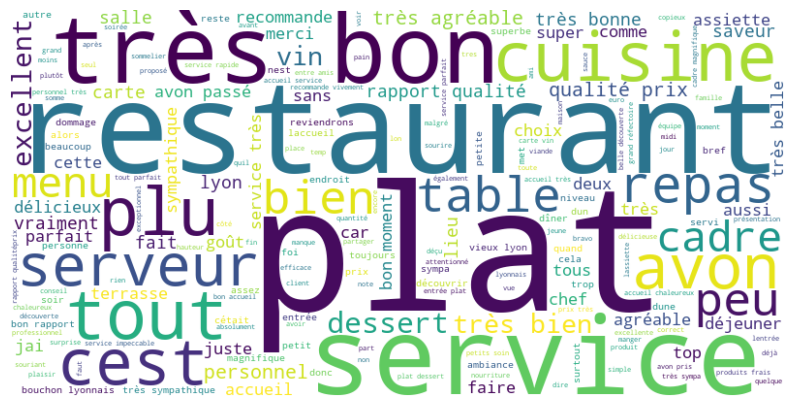

In [19]:
#Nuage de mots
from wordcloud import WordCloud 

# Concaténer tous les avis
tous_avis = ' '.join(avis_restaurants['review_cleaned'])

# Créer un nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(tous_avis)

# Afficher le nuage de mots
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


